In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv("train.csv")
data_train.head()
data_train.shape
# (14999, 9)

(14999, 9)

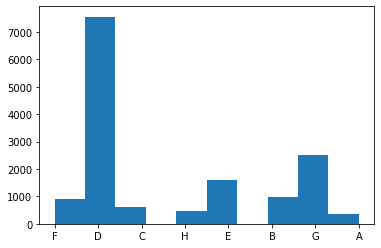

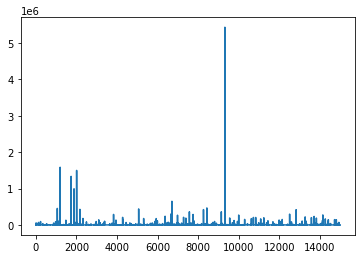

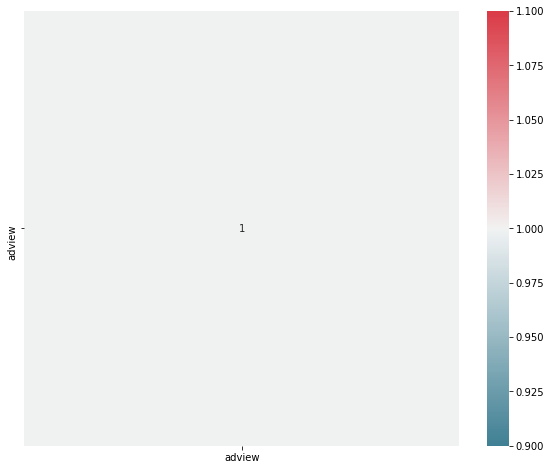

In [2]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [3]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [4]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [5]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [6]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [7]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 2557.6096311475408
Mean Squared Error: 877793840.7339481
Root Mean Squared Error: 29627.585806709736


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3188.6643677425413
Mean Squared Error: 611750980.4512597
Root Mean Squared Error: 24733.60023230059


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                  Dense(6, activation="relu",
                  input_shape=X_train.shape[1:]),
                  Dense(6,activation="relu"),
                  Dense(1)
                  ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
print(ann.summary())
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 683468189.5177 - mean_squared_error: 683468189.5177
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 700513650.4762 - mean_squared_error: 700513650.4762
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 631172572.7384 - mean_squared_error: 631172572.7384
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 850486640.6311 - mean_squared_error: 850486640.6311
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 376565770.8914 - mean_squared_error: 376565770.8914
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 706834786.7902 - mean_squared_error: 706834786.7902
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 641275410.8553 - mean_squared_error: 641275410.8553
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 881787220.2067 - mean_squared_error:

In [9]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
#ann.save("ann_youtubeadview.h5")

['randomforest_youtubeadview.pkl']

LOADING THE TRAINED MODEL


In [10]:
#Loading the trained Model
model_random_forest = joblib.load("randomforest_youtubeadview.pkl")

Loading and Prepocessing the "test.csv" Dataset, for predictions

In [11]:
#Importing the Test Data
test_data = pd.read_csv("test.csv")
print(test_data.head(10))
print(test_data.shape)

       vidid    views likes dislikes comment   published  duration category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S        B
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S        F
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S        D
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S        G
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S        B
5  VID_10315   145820   215       29      19  2014-01-23  PT39M18S        D
6   VID_7417    12921   169        3      73  2014-05-01   PT10M4S        D
7  VID_17788     4502    65        2       8  2016-07-13   PT2M35S        F
8  VID_14591   662956  1841      321     219  2014-01-13  PT13M57S        D
9   VID_1228   552009  6732       97    1100  2016-08-25  PT17M49S        B
(8764, 8)


In [12]:
#Removing Not-Present or Null Values from the Data
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']

#Mapping the Categories to Distinct-Integers
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_data["category"]=test_data["category"].map(category)
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [13]:
# Convert values to Distinct for views, likes, comments, dislikes and adview
test_data["views"]    =   pd.to_numeric(test_data["views"])
test_data["comment"]  =   pd.to_numeric(test_data["comment"])
test_data["likes"]    =   pd.to_numeric(test_data["likes"])
test_data["dislikes"] =   pd.to_numeric(test_data["dislikes"])
column_vidid          =   test_data['vidid']

# Label-Encoding the Category and Duration features
from sklearn.preprocessing import LabelEncoder
test_data['duration']  =   LabelEncoder().fit_transform(test_data['duration'])
test_data['published'] =   LabelEncoder().fit_transform(test_data['published'])

#dropping the vidid Column
test_data = test_data.drop(["vidid"],axis=1)
test_data.head()


,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,2
1,1040132,8171,340,1047,1825,2055,6
2,28534,31,11,1,1009,1506,4
3,1316715,2284,250,274,116,2265,7
4,1893173,2519,225,116,1892,1625,2


In [14]:
#using the previously defined checki() and func_sec() functions to define the Time in secs

mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
test_data["duration"]=time1
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [15]:
#Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data=scaler.fit_transform(test_data)
test_data.mean()

0.16965883079102045

In [16]:
#Performing the Predictions with the Saved Model
adview_predictions = model_random_forest.predict(test_data)
print(adview_predictions)

[ 456.88390405 1204.53175347  170.11126057 ...  828.59380571   13.03641039
   69.60919228]


Saving the Predictions : The predictions made on "test.csv" dataset are being saved in "predictions.csv"

In [17]:
pd.DataFrame(adview_predictions, columns=['Adview_Predictions']).to_csv('predictions.csv')